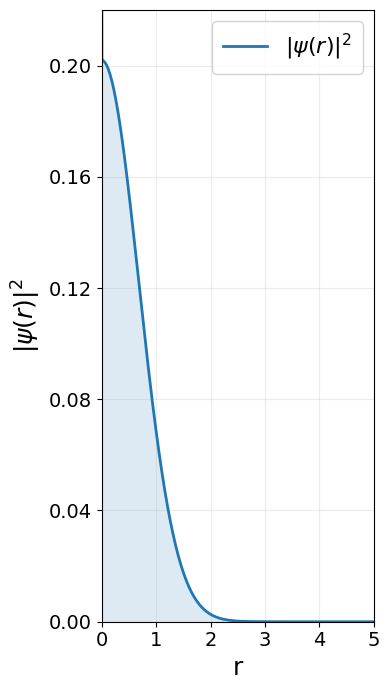

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import os

# ---------- load data ----------
data = np.loadtxt("psi_TSSP.txt")   # change filename if needed
r   = data[:, 0]
psi = data[:, 1]

# ---------- compute density ----------
# If psi here is the full radial u(r) = r*phi(r), then
#   |psi_phys(r)|^2 = |u(r)|^2 / r^2
# If psi is already the physical psi(r), then just do dens = |psi|**2
# I'll assume u(r) = psi (your usual convention):
dens =2 * np.abs(psi)**2 / np.maximum(r**2, 1e-30)

# stabilize the first point if r[0] is ~0
if len(r) > 1:
    dens[0] = np.abs(psi[1])**2 / max(r[1]**2, 1e-30)

# ---------- styling: single curve, same look as your code ----------
fig, ax = plt.subplots(figsize=(4, 7))

(line,) = ax.plot(r, dens, linewidth=2, label=r"$|\psi(r)|^2$")

ax.fill_between(r, dens, dens.min() - 0.01,
                alpha=0.15, color=line.get_color())

# axis limits – you can hardcode or let them auto
ax.set_xlim(0, 5.0)
ax.set_ylim(0, 0.22)

ax.grid(True, linestyle="-", alpha=0.25)

ax.legend(fontsize=16,
          frameon=True, framealpha=0.85,
          facecolor="white", edgecolor="0.8",
          fancybox=True, borderpad=0.5)

ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax.yaxis.set_major_locator(MaxNLocator(nbins=6))
ax.tick_params(axis="both", which="major", labelsize=14)

ax.set_xlabel("r", fontsize=18)
ax.set_ylabel(r"$|\psi(r)|^2$", fontsize=18)

plt.tight_layout()
plt.show()
